# Importing necessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#To ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [24]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

# Import Dataset

In [25]:
import pandas as pd

# read data into a DataFrame
data = pd.read_csv(r'C:\Users\Hp\Desktop\data science\Python\Datasets\Advertising.csv', index_col=0)
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# EDA

In [26]:
data.shape

(200, 4)

In [27]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Missing value check

In [28]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Outlier check

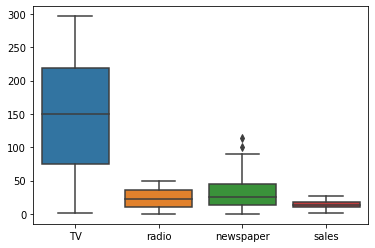

In [29]:
sns.boxplot(data = data)

We do not impute money related variable, thus we are accepting a couple of outlier points in newspaper

# Seperate X and Y

In [30]:

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
Y = data['sales']

 


# Train test Spilt

In [31]:

from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

# Model building and prediction

In [32]:

#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsRegressor

model_KNN=KNeighborsRegressor(n_neighbors=3, metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

# Evaluting model

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)


0.9411330460488659
1.5478569414229182


# Checking accuracy for different K values

In [34]:
from sklearn.metrics import r2_score

for K in range(1,16):

    model_KNN = KNeighborsRegressor(K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("R2 is ", r2_score(Y_test,Y_pred), 
        "for K-Value:",K)

R2 is  0.947505618529669 for K-Value: 1
R2 is  0.9293159406535845 for K-Value: 2
R2 is  0.9411330460488659 for K-Value: 3
R2 is  0.9394530965066451 for K-Value: 4
R2 is  0.9284857726620428 for K-Value: 5
R2 is  0.9171381300471962 for K-Value: 6
R2 is  0.8986986579101233 for K-Value: 7
R2 is  0.8941504138170911 for K-Value: 8
R2 is  0.8798578264845459 for K-Value: 9
R2 is  0.8608042002876257 for K-Value: 10
R2 is  0.8470466691144289 for K-Value: 11
R2 is  0.8483613805522731 for K-Value: 12
R2 is  0.8510763597780449 for K-Value: 13
R2 is  0.8490397921317565 for K-Value: 14
R2 is  0.8496233693296317 for K-Value: 15
